In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ==========================================
# 1. LOAD YOUR DATA
# ==========================================
# CHANGE THIS to your actual file name
file_path = 'CVChanges.xlsx' 

# Read the Excel file
df = pd.read_excel(file_path)


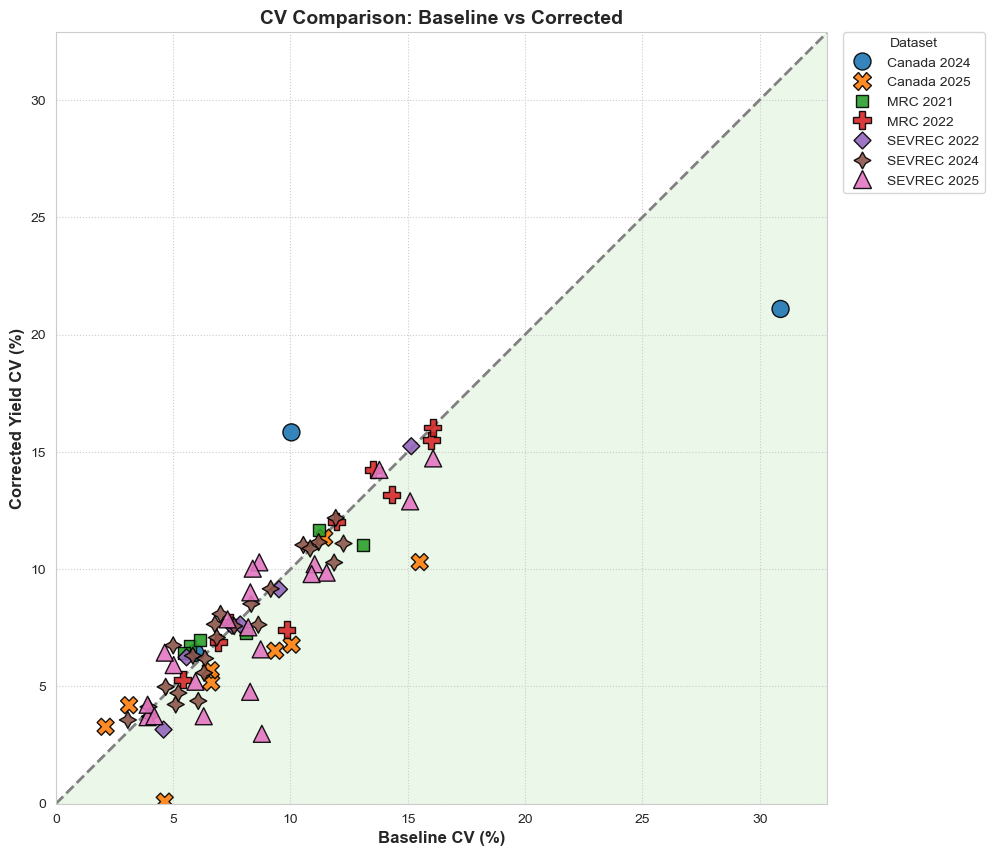

In [17]:

# ==========================================
# 2. PREPARE THE DATA
# ==========================================
# Create a unique Group label for every Location + Year combination
# This ensures all 6 (or more) of your sub-datasets get their own entry in the legend
df['Group'] = df['Location'].astype(str) + " " + df['Year'].astype(str)

# Pivot the data to get 'CWT_A' and 'CorrectedYield' side-by-side
# We group by Experiment and Tier to keep individual data points intact
pivot_df = df.pivot_table(
    index=['Group', 'Location', 'Year', 'Experiment', 'Tier'], 
    columns='Trait', 
    values='Percent_CV'
).reset_index()

# Check if columns exist (Error handling)
if 'CWT_A' not in pivot_df.columns or 'CorrectedYield' not in pivot_df.columns:
    print("Error: The script could not find 'CWT_A' or 'CorrectedYield' in your Trait column.")
    print("Found columns:", pivot_df.columns)
else:
    # ==========================================
    # 3. GENERATE THE PLOT
    # ==========================================
    plt.figure(figsize=(10, 10))
    sns.set_style("whitegrid", {'grid.linestyle': ':'})

    # Determine axis limits dynamically based on your actual data
    max_val = max(pivot_df['CWT_A'].max(), pivot_df['CorrectedYield'].max()) + 2
    min_val = 0

    # Draw the diagonal reference line (1:1 line)
    plt.plot([min_val, max_val], [min_val, max_val], color='gray', linestyle='--', linewidth=2, zorder=1)

    # Shade the "Improvement Zone" (Green area below the line)
    plt.fill_between([min_val, max_val], [min_val, max_val], min_val-10, color='#d9f0d3', alpha=0.5, zorder=0)

    # Create the Scatter Plot
    # hue='Group' -> Assigns a different color for each Location-Year
    # style='Group' -> Assigns a different shape for each Location-Year
    sns.scatterplot(
        data=pivot_df, 
        x='CWT_A', 
        y='CorrectedYield', 
        hue='Group', 
        style='Group',
        s=150,               # Marker size
        edgecolor='black',   # Black border around markers
        linewidth=1,
        alpha=0.9,
        zorder=2
    )

    # ==========================================
    # 4. FINALIZE FORMATTING
    # ==========================================
    plt.xlim(min_val, max_val)
    plt.ylim(min_val, max_val)
    plt.gca().set_aspect('equal', adjustable='box') # Ensures the plot is a perfect square

    plt.xlabel('Baseline CV (%)', fontsize=12, fontweight='bold')
    plt.ylabel('Corrected Yield CV (%)', fontsize=12, fontweight='bold')
    plt.title('CV Comparison: Baseline vs Corrected', fontsize=14, fontweight='bold')

    # Place legend outside the plot so it doesn't cover data
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, title='Dataset')

    plt.tight_layout()
    plt.show()

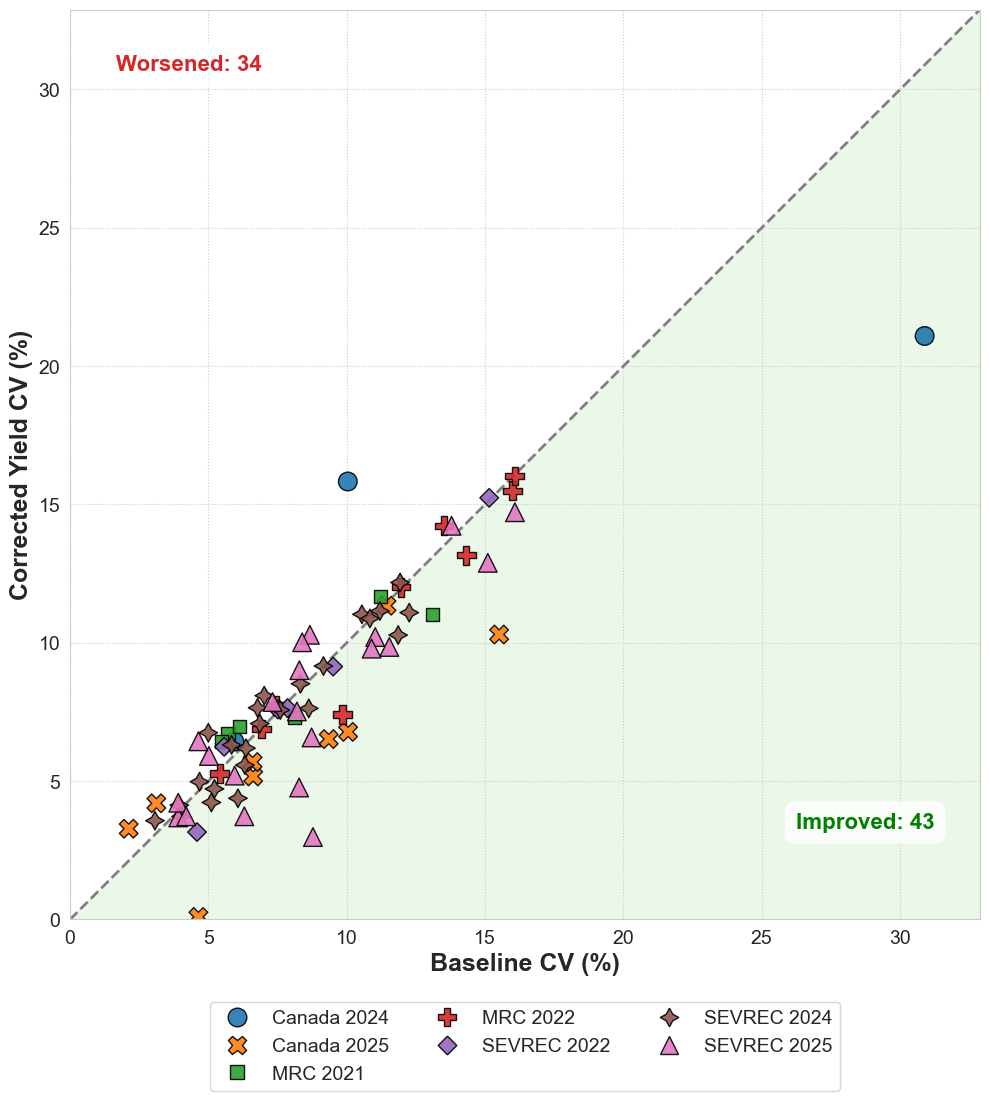

In [28]:
# 2. PREPARE THE DATA
# ==========================================
df['Group'] = df['Location'].astype(str) + " " + df['Year'].astype(str)

pivot_df = df.pivot_table(
    index=['Group', 'Location', 'Year', 'Experiment', 'Tier'], 
    columns='Trait', 
    values='Percent_CV'
).reset_index()

# Error handling
if 'CWT_A' not in pivot_df.columns or 'CorrectedYield' not in pivot_df.columns:
    print("Error: The script could not find 'CWT_A' or 'CorrectedYield' in your Trait column.")
else:
    # --- CALCULATE COUNTS ---
    # Improved: Corrected Yield is LOWER than Baseline (Below 1:1 line)
    n_improved = (pivot_df['CorrectedYield'] < pivot_df['CWT_A']).sum()
    # Worsened: Corrected Yield is HIGHER than Baseline (Above 1:1 line)
    n_worsened = (pivot_df['CorrectedYield'] > pivot_df['CWT_A']).sum()

    # ==========================================
    # 3. GENERATE THE PLOT
    # ==========================================
    plt.figure(figsize=(10, 11)) 
    sns.set_style("whitegrid", {'grid.linestyle': ':'})

    # Determine axis limits dynamically
    max_val = max(pivot_df['CWT_A'].max(), pivot_df['CorrectedYield'].max()) + 2
    min_val = 0

    # Draw the diagonal reference line (1:1 line)
    plt.plot([min_val, max_val], [min_val, max_val], color='gray', linestyle='--', linewidth=2, zorder=1)

    # Shade the "Improvement Zone" (Green area below the line)
    plt.fill_between([min_val, max_val], [min_val, max_val], min_val-10, color='#d9f0d3', alpha=0.5, zorder=0)

    # Create the Scatter Plot
    sns.scatterplot(
        data=pivot_df, 
        x='CWT_A', 
        y='CorrectedYield', 
        hue='Group', 
        style='Group',
        s=180,               # Slightly larger markers
        edgecolor='black', 
        linewidth=1,
        alpha=0.9,
        zorder=2
    )

    # --- ADD TEXT FOR COUNTS ---
    # "Improved" text goes in the bottom-right (Green Zone)
    plt.text(
        x=max_val * 0.95, 
        y=max_val * 0.1, 
        s=f'Improved: {n_improved}', 
        fontsize=16, 
        color='green', 
        fontweight='bold', 
        ha='right',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.5')
    )

    # "Worsened" text goes in the top-left (White Zone)
    plt.text(
        x=max_val * 0.05, 
        y=max_val * 0.95, 
        s=f'Worsened: {n_worsened}', 
        fontsize=16, 
        color='#d62728', # Red color 
        fontweight='bold', 
        ha='left', 
        va='top',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.5')
    )

    # ==========================================
    # 4. FINALIZE FORMATTING (UPDATED FONT SIZES)
    # ==========================================
    plt.xlim(min_val, max_val)
    plt.ylim(min_val, max_val)
    plt.gca().set_aspect('equal', adjustable='box') 

    # Increased Font Sizes
    plt.xlabel('Baseline CV (%)', fontsize=18, fontweight='bold')
    plt.ylabel('Corrected Yield CV (%)', fontsize=18, fontweight='bold')
    #plt.title('CV Comparison: Baseline vs Corrected', fontsize=20, fontweight='bold')
    
    # Increase the size of the numbers on the axis (ticks)
    plt.tick_params(axis='both', which='major', labelsize=14)

    # Legend Setup
    plt.legend(
        loc='upper center', 
        bbox_to_anchor=(0.5, -0.08), 
        fancybox=True, 
        shadow=False, 
        ncol=3,               
        fontsize=14,          # Increased legend font size
        title=None            
    )

    plt.tight_layout()
    plt.savefig('CV_Parity_HorizontalLegend_WithCounts.png', dpi=350, bbox_inches='tight')
    plt.show()

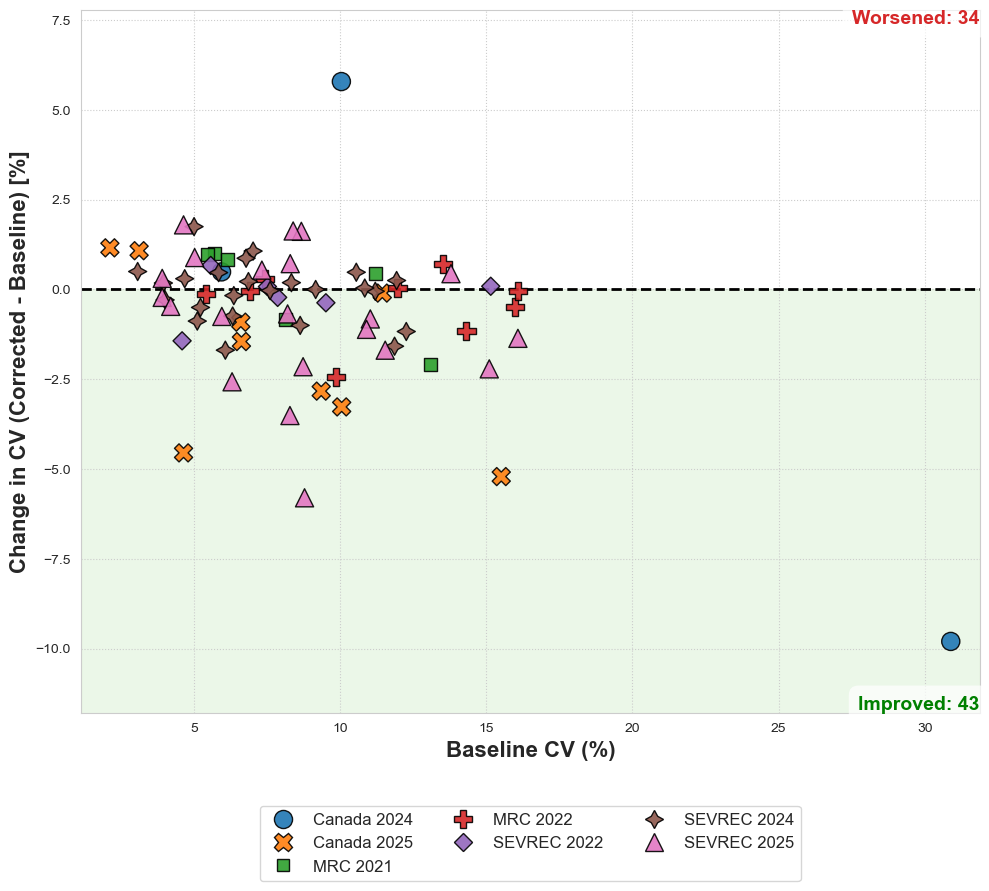

In [16]:
# ==========================================
# 2. DATA PREPARATION
# ==========================================
# Create a unique Group label for every Location + Year combination
df['Group'] = df['Location'].astype(str) + " " + df['Year'].astype(str)

# Pivot the data
pivot_df = df.pivot_table(
    index=['Group', 'Experiment', 'Tier'], 
    columns='Trait', 
    values='Percent_CV'
).reset_index()

# --- CALCULATE THE DIFFERENCE ---
# Y = Corrected Yield CV - Baseline CV
pivot_df['CV_Difference'] = pivot_df['CorrectedYield'] - pivot_df['CWT_A']

# --- COUNT CASES ---
count_improvement = (pivot_df['CV_Difference'] < 0).sum() # Below 0
count_worsening = (pivot_df['CV_Difference'] > 0).sum()   # Above 0

# ==========================================
# 3. SETUP PLOT
# ==========================================
plt.figure(figsize=(10, 9)) # Increased height slightly to make room for legend at bottom
sns.set_style("whitegrid", {'grid.linestyle': ':'})

# Reference Elements
plt.axhline(0, color='black', linestyle='--', linewidth=2, zorder=1)

# Determine limits
y_min = pivot_df['CV_Difference'].min() - 2
y_max = pivot_df['CV_Difference'].max() + 2
x_min = pivot_df['CWT_A'].min() - 1
x_max = pivot_df['CWT_A'].max() + 1

# Green Shading (Improvement Zone)
plt.fill_between([x_min, x_max], 0, y_min-5, color='#d9f0d3', alpha=0.5, zorder=0)

# ==========================================
# 4. DRAW DATA POINTS
# ==========================================
sns.scatterplot(
    data=pivot_df, 
    x='CWT_A', 
    y='CV_Difference', 
    hue='Group', 
    style='Group', 
    s=170, 
    edgecolor='black', 
    linewidth=1,
    alpha=0.9,
    zorder=2
)

# Text Annotations
plt.text(x=x_max, y=y_min, s=f'Improved: {count_improvement}', fontsize=14, color='green', fontweight='bold', ha='right', va='bottom', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))
plt.text(x=x_max, y=y_max, s=f'Worsened: {count_worsening}', fontsize=14, color='#d62728', fontweight='bold', ha='right', va='top', bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

# ==========================================
# 5. LABELS & HORIZONTAL LEGEND
# ==========================================
plt.xlabel('Baseline CV (%)', fontsize=16, fontweight='bold')
plt.ylabel('Change in CV (Corrected - Baseline) [%]', fontsize=16, fontweight='bold')
#plt.title('CV Improvement: Difference vs Baseline', fontsize=18, fontweight='bold')

plt.ylim(y_min, y_max)
plt.xlim(x_min, x_max)

# --- HORIZONTAL LEGEND SETUP ---
# loc='upper center': Centers the legend horizontally
# bbox_to_anchor=(0.5, -0.15): Moves it below the axis (0.5 is center x, -0.15 is below y)
# ncol=3: Arrange items in 3 columns (adjust this number based on how many groups you have)
plt.legend(
    loc='upper center', 
    bbox_to_anchor=(0.5, -0.12), 
    fancybox=True, 
    shadow=False, 
    ncol=3,               # Adjust this to 2, 3, or 4 depending on how wide you want it
    fontsize=12,
    title=None            # Removes the 'Group' title to save space
)

# Adjust layout to make sure legend isn't cut off
plt.tight_layout()

# Save and Show
plt.savefig('CVchanges_horizontal_legend.png', dpi=350, bbox_inches='tight')
plt.show()